Привет, Наталья!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего первого проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех
    
Когда всё сделано правильно.
</div>
    
    
    
Будет здорово, если для ответов ты выберешь любой **<font color="maroon">читабельный и заметный цвет</font>**, так мне будет проще все проверить.


При доработке проекта попрошу тебя сохранить и не видоизменять заметки ревьюера, это осложняет повторную проверку.

<div class="alert alert-block alert-success">
    
## Итоговый комментарии от ревьюера:
    
#### Успех 

Спасибо тебе за проект. В работе я отметил несколько сильных сторон. Ты здорово умеешь делать Предобработку, проверку Гипотез и строить понятные графики. Эти навыки тебе очень пригодятся в дальнейших проектах. Так держать:)
    
    
В проекте есть несколько замечаний. Уверен, учесть их в работе тебе не составит труда. Буду ждать доработанный проект. Удачи!
</div>

<div class="alert alert-block alert-success">
    
## Итоговый комментарии от ревьюера ver.2
    
#### Успех 

Благодарю тебя за исправления замечаний. Вот сейчас я могу принять проект. Ты проделала хорошую работу. Надеюсь, ты в дальнейшем будешь использовать рекомендации и совершенствовать свои навыки с каждым новым проектом. 
    
Желаю удачи, ты справишься:)
</div>

# Введение

Данные: информация о 500 пользователях "Мегалайна" за 2018 год 
Задача: проанализировать поведение клиентов и сделать вывод — какой тариф лучше. Выяснить, отличается ли средняя выручка по пользователям с разными тарифами и в разных регионах

# Чтение и проверка данных

In [301]:

import pandas as pd
import numpy as np
from scipy import stats as st


In [302]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Супер. Мы сохранили таблицы в переменные. 
</div>

По очереди смотрим на все данные и ищем возможные ошибки

In [303]:
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Вывод: В столбце call_date необходимо поменять тип на дату-время

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Да, так и есть 
</div>

In [304]:
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Вывод: есть случайный столбец Unnamed: 0	. Информации он не содержит, дублирует индекс строки. Его нужно удалить. 
В столбце session_date	поменять тип на дату-время

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Unnamed: 0 возникает, когда данные сохраняют с указанием индекса pd.DataFrame().to_csv(..., index=column). Если при чтении указать этот столбец pd.read_csv(..., index_col=0) - данные сразу прочитаются корректно..
</div>

In [305]:
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Вывод: В столбце message_date необходимо поменять тип на дату-время

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И здесь согласен. 
</div>

In [306]:
tariffs.info()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


С этим файлом проблем нет

In [307]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Вывод: Нужно проверить city на наличие дубликатов, в столбце reg_date поменять тип на дату-время

**Выводы после просмотра всех файлов**

В calls:

 - поменять тип call_date  на дату-время

В internet:
 - удалить столбец 	Unnamed: 0
 - поменять тип session_date на дату-время
 
В messages:
 - поменять тип message_date на дату-время
 
В users:
 - проверить city на наличие дубликатов
 - поменять тип reg_date на дату-время

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Хорошее знакомство с данными получилось. Мы получили первичную информацию и составили неболбшой план дальнейших действий. 
</div>

## Поиск выпадающих значений 

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

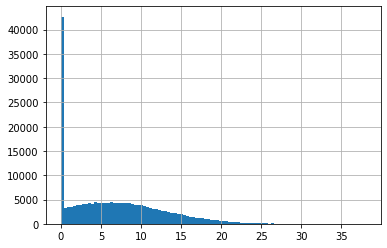

In [308]:
calls['duration'].hist(bins=100)
calls['duration'].describe()

Известно, что звонки с нулевой продолжительностью - это не ошибка, а пропущенные звонки. Удалять не будем. 
В остальном данные рапсределены нормально. Максимальная длительность разговора, 38 минут, также выглядит реалистично

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Очень хорошо, что рассмотрела распределение по звонкам. 
</div>

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

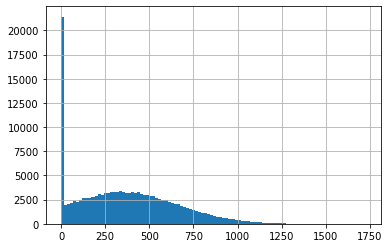

In [309]:
internet['mb_used'].hist(bins=100)
internet['mb_used'].describe()

Нулевые интернет-сессии, учитывая, что Мегалайн округляет мегабайтыы до гигабайт, есть смысл удалить

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Верно. Нулевые сессии символизируют неудачные попытки выхода в интернет. 
</div>

count    129798.000000
mean        426.087210
std         255.596447
min           0.030000
25%         227.460000
50%         400.540000
75%         592.947500
max        1724.830000
Name: mb_used, dtype: float64

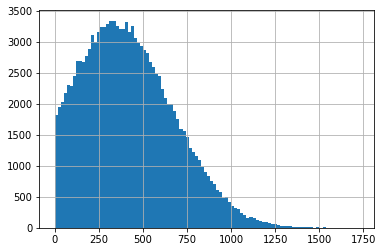

In [310]:
internet = internet.drop(internet[internet['mb_used']==0].index)
internet['mb_used'].hist(bins=100)
internet['mb_used'].describe()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Вот а теперь все здорово. 
</div>

# Подготовка данных

In [311]:
#удаление лишнего столбца
internet = internet.drop(columns=['Unnamed: 0'])

#перевод нужных столбцов в формат дата-время
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Методы использованы отличные для преобразования в формат даты. 
</div>

In [312]:
#поиск возможных дубликатов
sorted(users['city'].unique())

['Архангельск',
 'Астрахань',
 'Балашиха',
 'Барнаул',
 'Белгород',
 'Брянск',
 'Владивосток',
 'Владикавказ',
 'Владимир',
 'Волгоград',
 'Волжский',
 'Вологда',
 'Воронеж',
 'Грозный',
 'Екатеринбург',
 'Иваново',
 'Ижевск',
 'Иркутск',
 'Казань',
 'Калининград',
 'Калуга',
 'Кемерово',
 'Киров',
 'Кострома',
 'Краснодар',
 'Красноярск',
 'Курган',
 'Курск',
 'Липецк',
 'Магнитогорск',
 'Махачкала',
 'Москва',
 'Мурманск',
 'Набережные Челны',
 'Нижневартовск',
 'Нижний Новгород',
 'Нижний Тагил',
 'Новокузнецк',
 'Новороссийск',
 'Новосибирск',
 'Омск',
 'Оренбург',
 'Орёл',
 'Пенза',
 'Пермь',
 'Петрозаводск',
 'Подольск',
 'Ростов-на-Дону',
 'Рязань',
 'Самара',
 'Санкт-Петербург',
 'Саранск',
 'Саратов',
 'Севастополь',
 'Смоленск',
 'Сочи',
 'Ставрополь',
 'Стерлитамак',
 'Сургут',
 'Тамбов',
 'Тверь',
 'Тольятти',
 'Томск',
 'Тула',
 'Тюмень',
 'Улан-Удэ',
 'Ульяновск',
 'Уфа',
 'Хабаровск',
 'Химки',
 'Чебоксары',
 'Челябинск',
 'Череповец',
 'Чита',
 'Якутск',
 'Ярославль']

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для сортировки столбца таблицы лучше используй sort_values()
</div>

Дубликатов нет

In [313]:
#Во всех файлах делаем новый столбец с месяцем

calls['month'] = pd.DatetimeIndex(calls['call_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month 
internet['month'] = pd.DatetimeIndex(internet['session_date']).month 



<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
С этим тоже проблем не возникло.
</div>

In [314]:
#Для дальнейших расчетов формируем сгруппированные по пользователям данные о потраченых минутах, мегабайтах и смс


messages_grouped=messages.groupby(by=['user_id', 'month'])['id'].count().unstack(fill_value=0).stack()
calls_grouped=calls.groupby(by=['user_id', 'month'])['id'].count().unstack(fill_value=0).stack()
internet_grouped=internet.groupby(by=['user_id', 'month'])['id'].count().unstack(fill_value=0).stack()



In [315]:
messages_grouped.head(15)

user_id  month
1000     1         0
         2         0
         3         0
         4         0
         5        22
         6        60
         7        75
         8        81
         9        57
         10       73
         11       58
         12       70
1002     1         0
         2         0
         3         0
dtype: int64

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Достаточно интересный способ группировки таблиц, однако, он может родить дополнительные проблемы при подсчете выручки, так как у тебя сюда попадают месяца, где по расходам стоят 0. Лучше calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']).reset_index()
    
    
А еще, перед группировкой таблицы по звонкам тебе надо округлить длительность по звонкам. Лучше через метод np.ceil()
    
А по интернету лучше это делать после группировки.
</div>

 **<font color="maroon">Изначально я группировала с помощью pivot_table, но в таком виде мне не удалось наладить работу функции gain_calculation. Она вовращала результат типа array, с которым ничего нельзя было сделать, даже перевести в скаляр. Пришлось перейти на groupby. Округление минут и Мб у меня в функции подсчета. Мне показалось так логичнее, потому что округление нужно только для рассчета, а сами данные я оставляю нетронутыми, вдруг еще понадобятся.</font>**
 
 

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Такой метод, который использовала ты, жизнеспособен, но достаточно сложный функционально. Он в большинстве своем приводит к большему количеству проблем и сложностей. Поэтому, я бы хотел, чтобы ты обращала внимание на это в будущем. 
</div>

 **<font color="maroon">Внесла изменения в функцию ниже</font>**

In [316]:


def gain_calculation(row, month):
      
    user_id=row['user_id']
    tariff= row['tariff']
    tariff_info=tariffs[tariffs['tariff_name']==str(tariff)]   
    
    try:
        msg = messages_grouped[user_id,month].squeeze()
    except:
        msg=0
    
    try:
        mins = np.ceil(calls_grouped[user_id,month].squeeze()) #берем в рассчет округленное значение
    except:
        mins=0
    
    try:
        mb = np.ceil(internet_grouped[user_id,month].squeeze()/1024) #берем в рассчет округленное значение
    except:
        mb=0
   
    
    msg_lim = tariff_info['messages_included'].squeeze()
    min_lim = tariff_info['minutes_included'].squeeze()
    mb_lim = tariff_info['mb_per_month_included'].squeeze()
    
    msg_fee = tariff_info['rub_per_message'].squeeze()
    min_fee = tariff_info['rub_per_minute'].squeeze()
    mb_fee = tariff_info['rub_per_gb'].squeeze() 
    
    fee = tariff_info['rub_monthly_fee'].squeeze()
    
    if msg_lim>=msg:
        msg_over = 0
    else:
        msg_over= msg-msg_lim
    
    if min_lim>=mins:
        min_over = 0
    else:
        min_over= mins-min_lim  
    
    if mb_lim>=mb:
        mb_over = 0
    else:
        mb_over= mb-mb_lim    
        
        
   # вот здесь добавила еще параметр on, чтобы не считать абонентскую плату тем, кто еще не начал пользоваться

    if mins+msg+mb==0:
        on =0
    else:
        on=1
    
    gain = fee*on+msg_over*msg_fee+min_over*min_fee+mb_over*mb_fee # и тут домножение на on
    
    return gain
    
    

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Так намного лучше  
</div>

In [317]:
#новая таблица для хранения данных о помесячной плате для каждого абонента

gain=pd.DataFrame()
gain['user_id']=users['user_id']
gain['tariff']=users['tariff']

for i in range(1,13):
    gain[i]=gain.apply(gain_calculation,month=i,axis=1)
    
    
gain = gain.set_index(['user_id','tariff'])

gain


,,1,2,3,4,5,6,7,8,9,10,11,12
user_id,tariff,,,,,,,,,,,,
1000,ultra,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950
1001,smart,0,0,0,0,0,0,0,0,0,0,550,550
1002,smart,0,0,0,0,0,550,550,550,550,550,550,550
1003,ultra,0,0,0,0,0,0,0,1950,1950,1950,1950,1950
1004,ultra,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,ultra,0,0,0,0,0,0,0,1950,1950,1950,1950,1950
1496,smart,550,550,550,550,550,550,550,550,550,550,550,553
1497,smart,0,0,0,0,0,0,0,0,0,550,550,550


<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
А вот тут видно, что рассчеты у тебя неправильные. Некоторые пользователи не начали пользоваться тарифом в начале года, а у тебя по каждому рассчет, будто с Января он уже был. 

Особенно это у тебя видно, если ты выведешь calls_grouped. Там по пользователю 1000 начинается расход только с 5 месяца. 

В общем, чтобы это все исправить, используй лучше тот способ, который я оставил выше. 
    
После того, как ты верно сгруппируешь все таблицы, попробуй соединить их методом merge, а дальше уже функция по подсчету выручки.
</div>

 **<font color="maroon">Рассчеты поправила, но способ менять не стала)</font>**

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Сейчас корректно  
</div>

In [318]:

# расчет средней месячной платы
gain['mean']=gain[gain[:]!=0].mean(axis=1)
gain

,,1,2,3,4,5,6,7,8,9,10,11,12,mean
user_id,tariff,,,,,,,,,,,,,
1000,ultra,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,1950.00
1001,smart,0,0,0,0,0,0,0,0,0,0,550,550,550.00
1002,smart,0,0,0,0,0,550,550,550,550,550,550,550,550.00
1003,ultra,0,0,0,0,0,0,0,1950,1950,1950,1950,1950,1950.00
1004,ultra,0,0,0,0,1950,1950,1950,1950,1950,1950,1950,1950,1950.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,ultra,0,0,0,0,0,0,0,1950,1950,1950,1950,1950,1950.00
1496,smart,550,550,550,550,550,550,550,550,550,550,550,553,550.25
1497,smart,0,0,0,0,0,0,0,0,0,550,550,550,550.00


# Анализ данных

Для дальнейшего анализа удобнее сделать сводные таблицы по звонкаи, сообщениям и интернет-сессиям

In [319]:
#количество сделанных звонков и израсходованных минут разговора по месяцам
calls_pivot = calls.pivot_table(index='user_id',
                                columns='month', 
                                values = 'duration', 
                                aggfunc=['sum'],
                                fill_value=0)

#количество отправленных сообщений по месяцам
messages_pivot = messages.pivot_table(index=['user_id'],
                                      columns='month', 
                                      values = 'id',
                                      aggfunc=['count'],
                                      fill_value=0,
                                      )

#объем израсходованного интернет-трафика по месяцам
internet_pivot = internet.pivot_table(index='user_id',
                                      columns='month', 
                                      values = 'mb_used',
                                      aggfunc=['sum'],
                                      fill_value=0,)


In [320]:
messages_pivot.columns = messages_pivot.columns.droplevel(0)
calls_pivot.columns = calls_pivot.columns.droplevel(0)
internet_pivot.columns = internet_pivot.columns.droplevel(0)

## Количество сообщений пользователей двух тарифов

In [321]:
#Добавляем расчет среднего 
messages_pivot['mean']=messages_pivot.mean(axis=1)
messages_pivot = messages_pivot.merge(users[['user_id','tariff']],on='user_id', how='left')
messages_pivot 

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,mean,tariff
0,1000,0,0,0,0,22,60,75,81,57,73,58,70,41.333333,ultra
1,1002,0,0,0,0,0,4,11,13,4,10,16,12,5.833333,smart
2,1003,0,0,0,0,0,0,0,37,91,83,94,75,31.666667,ultra
3,1004,0,0,0,0,95,134,181,151,146,165,158,162,99.333333,ultra
4,1005,7,38,56,41,42,47,56,64,52,44,51,54,46.000000,smart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1495,0,0,0,0,0,0,0,13,82,82,79,84,28.333333,ultra
422,1496,9,45,46,49,40,35,42,41,29,35,46,51,39.000000,smart
423,1497,0,0,0,0,0,0,0,0,0,20,14,17,4.250000,smart
424,1498,0,0,0,0,0,0,20,62,44,42,0,0,14.000000,smart


count    426.000000
mean      24.068075
std       22.300629
min        0.083333
25%        7.145833
50%       17.958333
75%       34.500000
max      121.916667
Name: mean, dtype: float64

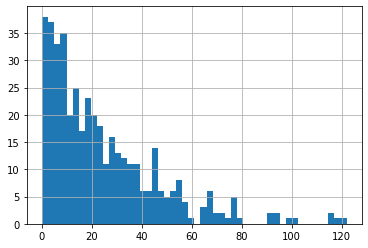

In [322]:
messages_pivot['mean'].hist(bins=50)
messages_pivot['mean'].describe()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
График хороший получился
</div>

In [323]:
#группировка по двум тарифам

messages_pivot.groupby('tariff').mean()

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,mean
tariff,,,,,,,,,,,,,,
smart,1245.301325,2.052980,4.625828,8.122517,11.400662,15.768212,18.139073,22.463576,26.175497,28.960265,32.870861,35.655629,40.165563,20.533389
ultra,1269.677419,2.451613,4.250000,9.637097,14.000000,20.451613,28.266129,36.580645,41.798387,48.491935,57.959677,60.290323,67.943548,32.676747


count    302.000000
mean      20.533389
std       18.532110
min        0.083333
25%        6.250000
50%       15.000000
75%       29.895833
max       91.000000
Name: mean, dtype: float64

count    124.000000
mean      32.676747
std       27.794582
min        0.666667
25%       12.458333
50%       24.625000
75%       43.437500
max      121.916667
Name: mean, dtype: float64

<AxesSubplot:>

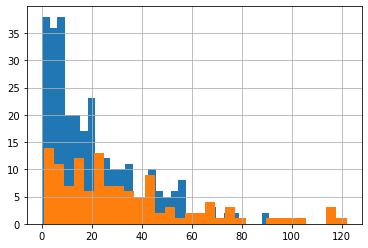

In [324]:
#сравнение средних и распределений

display(messages_pivot[messages_pivot['tariff']=='smart']['mean'].describe())
display(messages_pivot[messages_pivot['tariff']=='ultra']['mean'].describe())
messages_pivot[messages_pivot['tariff']=='smart']['mean'].hist(bins=30)
messages_pivot[messages_pivot['tariff']=='ultra']['mean'].hist(bins=30)

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
####  Совет
    
Здорово, что решила показать разницу по двум тарифам не одном графике, но надо подписать легенды, чтобы нам сразу было понятно, где какой тариф находится. 
</div>

Из сравнения распределений видно, что пользователи двух тарифов отправляют разные количества сообщений. Для строгости проверим нулевую гипотезу:

Н_0 среднее количество сообщений пользователей тарифа "Ультра" равно среднему количеству сообщений ползьователей тарифа "Смарт"

Альтернативная гипотеза: 
Н_1 среднее количество сообщений пользователей тарифа "Ультра" не равно среднему количеству сообщений ползьователей тарифа "Смарт"



In [325]:

#Проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
st.ttest_ind(messages_pivot[messages_pivot['tariff']=='smart']['mean'], 
             messages_pivot[messages_pivot['tariff']=='ultra']['mean'], 
             equal_var = False)

Ttest_indResult(statistic=-4.473862885300851, pvalue=1.4028987870419034e-05)

p-value меньше 1%. Вероятность получить такое или большее различие по двум выборкам почти нулевая. Можно сказать, что среднее количество сообщений пользователей тарфиов Ультра и Смарт не равно

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Классно, что решила на это посмотреть. 
</div>

## Интернет-трафик пользователей разных тарифов

In [326]:
#округление
internet_pivot.loc[:,1:12] = np.ceil(internet_pivot.loc[:,1:12]/1024)

#расчет среднего 
internet_pivot['mean']=internet_pivot[internet_pivot[:]!=0].mean(axis=1)

#добавление информации о тарифах
internet_pivot = internet_pivot.merge(users[['user_id','tariff']],on='user_id', how='left')
internet_pivot 

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,mean,tariff
0,1000,0.0,0.0,0.0,0.0,3.0,23.0,14.0,14.0,15.0,15.0,15.0,10.0,13.625000,ultra
1,1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,14.0,16.000000,smart
2,1002,0.0,0.0,0.0,0.0,0.0,11.0,18.0,20.0,17.0,14.0,19.0,18.0,16.714286,smart
3,1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,13.0,15.0,12.0,10.0,11.800000,ultra
4,1004,0.0,0.0,0.0,0.0,14.0,18.0,22.0,28.0,15.0,19.0,16.0,18.0,18.750000,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,33.0,29.0,39.0,23.0,25.400000,ultra
493,1496,4.0,28.0,25.0,21.0,24.0,20.0,24.0,23.0,27.0,28.0,25.0,21.0,22.500000,smart
494,1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,14.0,20.0,15.333333,smart
495,1498,0.0,0.0,0.0,0.0,0.0,0.0,8.0,24.0,22.0,21.0,0.0,0.0,18.750000,smart


count    497.000000
mean      17.353831
std        5.474147
min        2.500000
25%       14.111111
50%       16.800000
75%       19.583333
max       38.500000
Name: mean, dtype: float64

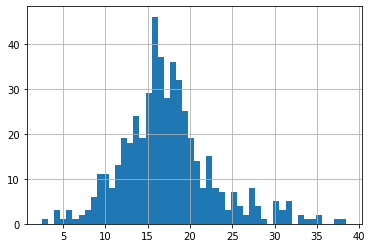

In [327]:
internet_pivot['mean'].hist(bins=50)
internet_pivot['mean'].describe()

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Поскольку у нас тарификация в Гб, то и график надо в Гб отобразить.
</div>

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Сейчас отлично  
</div>

 **<font color="maroon">исправила</font>**

In [328]:
#группировка по двум тарифам

internet_pivot.groupby('tariff').mean()

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,mean
tariff,,,,,,,,,,,,,,
smart,1243.771429,0.848571,1.962857,3.351429,4.360000,6.408571,7.474286,9.117143,11.237143,12.177143,14.180000,15.348571,17.525714,16.343947
ultra,1262.979592,0.809524,1.959184,4.442177,6.346939,8.829932,10.823129,12.693878,14.265306,15.054422,16.789116,18.054422,20.557823,19.758316


count    350.000000
mean      16.343947
std        3.543999
min        5.727273
25%       14.027778
50%       16.333333
75%       18.720455
max       27.250000
Name: mean, dtype: float64

count    147.000000
mean      19.758316
std        7.969557
min        2.500000
25%       15.000000
50%       19.111111
75%       25.791667
max       38.500000
Name: mean, dtype: float64

<AxesSubplot:>

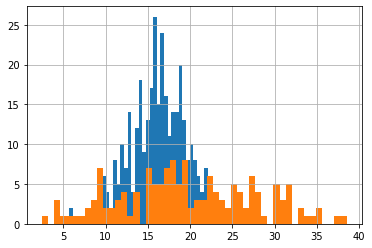

In [329]:
#сравнение средних и распределений

display(internet_pivot[internet_pivot['tariff']=='smart']['mean'].describe())
display(internet_pivot[internet_pivot['tariff']=='ultra']['mean'].describe())
internet_pivot[internet_pivot['tariff']=='smart']['mean'].hist(bins=50)
internet_pivot[internet_pivot['tariff']=='ultra']['mean'].hist(bins=50)

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Ну и тут тоже  
</div>

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Ну и тут хорошо выходит 
</div>

Из сравнения распределений видно, что у пользователей двух тарифов разный расход трафика. Для строгости проверим нулевую гипотезу:

Н_0 среднее количество потраченных мегабайт у пользователей тарифа "Ультра" равно среднему количеству потраченных мегабайт ползьователей тарифа "Смарт"

Альтернативная гипотеза: 
Н_1 среднее потраченных мегабайт пользователей тарифа "Ультра" не равно среднему количеству потраченных мегабайт ползьователей тарифа "Смарт"


In [330]:

#Проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
st.ttest_ind(internet_pivot[internet_pivot['tariff']=='smart']['mean'], 
             internet_pivot[internet_pivot['tariff']=='ultra']['mean'], 
             equal_var = False)

Ttest_indResult(statistic=-4.991252934758521, pvalue=1.4694250905467666e-06)

p-value меньше 1%. Нулевая гипотеза не отвергнута

## Расход минут у пользователей разных тарифов

In [331]:
#расчет среднего
calls_pivot['mean']=calls_pivot.mean(axis=1)

#добавление информации о тарифе
calls_pivot = calls_pivot.merge(users[['user_id','tariff']],on='user_id', how='left')
calls_pivot 

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,mean,tariff
0,1000,0.00,0.00,0.00,0.00,150.06,158.90,318.80,389.87,440.14,328.45,319.04,312.98,201.520000,ultra
1,1001,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,408.12,391.34,66.621667,smart
2,1002,0.00,0.00,0.00,0.00,0.00,110.37,204.75,269.71,195.85,199.48,228.03,222.98,119.264167,smart
3,1003,0.00,0.00,0.00,0.00,0.00,0.00,0.00,355.67,904.89,809.07,775.39,755.50,300.043333,ultra
4,1004,0.00,0.00,0.00,0.00,32.29,159.14,124.42,128.01,110.57,133.61,109.72,123.45,76.767500,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,1495,0.00,0.00,0.00,0.00,0.00,0.00,0.00,87.03,766.62,971.33,892.65,970.94,307.380833,ultra
488,1496,45.76,561.41,521.95,494.29,459.74,529.21,550.06,497.78,457.39,426.65,633.22,483.91,471.780833,smart
489,1497,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,463.26,346.09,515.33,110.390000,smart
490,1498,0.00,0.00,0.00,0.00,0.00,0.00,166.25,376.04,446.68,232.63,0.00,0.00,101.800000,smart


count     492.000000
mean      231.841131
std       164.464085
min         5.240833
25%       101.735417
50%       195.549583
75%       332.042292
max      1021.516667
Name: mean, dtype: float64

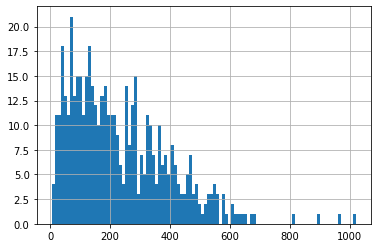

In [332]:
calls_pivot['mean'].hist(bins=100)
calls_pivot['mean'].describe()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тут хорошо 
</div>

In [333]:
#группировка по двум тарифам
calls_pivot.groupby('tariff').mean()

,user_id,1,2,3,4,5,6,7,8,9,10,11,12,mean
tariff,,,,,,,,,,,,,,
smart,1243.068768,18.806418,47.025444,81.164871,111.108682,147.550946,175.368195,222.020659,267.921404,301.361032,338.877937,371.763009,436.165616,209.927851
ultra,1263.650350,25.475524,47.088811,119.631538,166.111818,225.702727,266.057413,327.888252,360.608811,409.427692,453.146713,478.747832,543.974406,285.321795


count    349.000000
mean     209.927851
std      137.208158
min       10.846667
25%      101.800000
50%      181.331667
75%      300.046667
max      672.752500
Name: mean, dtype: float64

count     143.000000
mean      285.321795
std       208.156114
min         5.240833
25%        97.379583
50%       255.837500
75%       405.062083
max      1021.516667
Name: mean, dtype: float64

<AxesSubplot:>

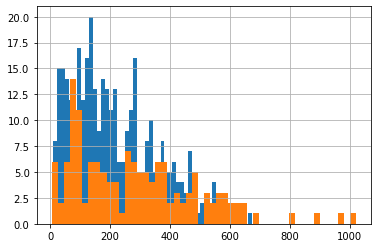

In [334]:
#сравнение средних и распределений
display(calls_pivot[calls_pivot['tariff']=='smart']['mean'].describe())
display(calls_pivot[calls_pivot['tariff']=='ultra']['mean'].describe())
calls_pivot[calls_pivot['tariff']=='smart']['mean'].hist(bins=50)
calls_pivot[calls_pivot['tariff']=='ultra']['mean'].hist(bins=50)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И здесь согласен
</div>

Из сравнения распределений видно, что у пользователей двух тарифов разный расход минут. Для строгости проверим нулевую гипотезу:

Н_0 среднее количество потраченных минут у пользователей тарифа "Ультра" равно среднему количеству потраченных минут у  ползьователей тарифа "Смарт"

Альтернативная гипотеза: 

Н_1 среднее количество потраченных минут у  пользователей тарифа "Ультра" не равно среднему количеству потраченных минут у ползьователей тарифа "Смарт"


In [335]:

#Проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
st.ttest_ind(calls_pivot[calls_pivot['tariff']=='smart']['mean'], 
             calls_pivot[calls_pivot['tariff']=='ultra']['mean'], 
             equal_var = False)

Ttest_indResult(statistic=-3.990590948598475, pvalue=9.330686362524667e-05)

p-value меньше 1%. Нулевая гипотеза не отвергнута

# Проверка Гипотез

## Гипотеза 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются


Нулевая гипотеза звучит так:

H_0 средняя выручка пользователей тарифа "Ультра" равна средней выручке пользователей тарифа "Смарт"

Для того, чтобы ее проверить, можно рассчитать средние и сравнить распределения, так как значений у нас не много. Но для учебных целей применим и статистический тест 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Гипотеза задана, отлично
</div>

In [336]:
gain.reset_index(inplace=True)
gain['mean']=gain['mean'].fillna(0)

In [337]:
display(gain[gain['tariff']=='smart']['mean'].describe())
display(gain[gain['tariff']=='ultra']['mean'].describe())


count    351.000000
mean     566.021652
std       47.760997
min        0.000000
25%      550.000000
50%      550.000000
75%      562.500000
max      767.125000
Name: mean, dtype: float64

count     149.000000
mean     1936.912752
std       159.750225
min         0.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      1950.000000
Name: mean, dtype: float64

В наших данных ни один пользователь тарифа "Ультра" не вышел за лимит минут, мегабайт и смс, поэтому все 149 абонентов платили по 1950 рублей. Статистический тест должен выдать p-value=0. Нулевая гипотеза опровергнута

In [338]:
st.ttest_ind(gain[gain['tariff']=='smart']['mean'], 
             gain[gain['tariff']=='ultra']['mean'], 
             equal_var = False)

Ttest_indResult(statistic=-102.81764566122219, pvalue=1.3701896016607504e-147)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Хороший подход к проверке гипотез. Согласен с выводом.
</div>

Найдем максимальную переплату у пользователей Смарт

In [339]:
gain[gain['tariff']=='smart'].max()

user_id       1499
tariff       smart
1              622
2              655
3              730
4              715
5              709
6              802
7              811
8              802
9              808
10             817
11             772
12             829
mean       767.125
dtype: object

## Гипотеза 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нулевая гипотеза звучит так:

H_0 средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов

Альтернативная гипотеза: 


H_0 средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов


In [340]:
gain = gain.merge(users[['user_id','city']],on='user_id', how='left')


In [341]:
display(gain[gain['city']=='Москва']['mean'].describe())
display(gain[gain['city']!='Москва']['mean'].describe())


count      99.000000
mean     1012.318182
std       651.864740
min       550.000000
25%       550.000000
50%       553.750000
75%      1950.000000
max      1950.000000
Name: mean, dtype: float64

count     401.000000
mean      965.222194
std       631.133525
min         0.000000
25%       550.000000
50%       558.000000
75%      1950.000000
max      1950.000000
Name: mean, dtype: float64

In [342]:
st.ttest_ind(gain[gain['city']=='Москва']['mean'], 
             gain[gain['city']!='Москва']['mean'], 
             equal_var = True)

Ttest_indResult(statistic=0.6605909898847435, pvalue=0.5091800954223995)

Вероятность случайно получить такое или большее различие средних больше 50%. Опровергнуть нулевую гипотезу не получилось

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Аналогично
</div>

# Вывод

Тариф "Ультра" приносит больше денег. Пользователи этого тарифа не выходят за заданный лимит, но ежемесячная плата в три раза выше ежемесячной платы по тарифу Смарт

Из данной выборки следует, что траты абонентов из Москвы не отличается от трат абонентов из других регионов. Однако москвичей в базе всего 99. Возможно на более крупной выборке будут другие результаты

Максимальная переплата у абонентов тарифа Смарт — менее 300 рублей. Это значит, что советовать им переходить на Ультра нет смысла. Даже регуялрная перплата в 300 рублей не сделает переход выгодным. 

Возможное предложение -- ввести третий, промежуточный тариф, для тех кто переплачивает за Смарт. 

Рекомендуется провести то же исследование на другой выборке абонентов. Например, взять только тех, кто был с компанией весь год. В текущей выборке слишком много пользователей, пользовавшихся услугами Мегалайн 2-4 месяца. Учитывая, что всего в выборке 500 человек, это влияет на результаты.


<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
А вот здесь похвалить не могу, увы. 
    
У тебя было такое машстабное исследование, а вывод всего на пару предложений. Нужно в вывод добавлять больше инсайтов. Они могут рассказывать об ошибках в данных, о каких-то интересных наблюдениях и так далее.  
    
    
А еще будет здорово, если оставишь в проекте рекомендации.
</div>

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Вот а сейчас хороший и полноценный вывод получается. 
</div>

<div class="alert alert-block alert-info">

## Итоговый комментарии от ревьюера:
    
#### Успех

Благодарю тебя за выполнение проекта. Мне очень понравилось, как ты разобралась с предобработкой данных. Твои решения последовательны и в работе нет лишнего кода. Ты строишь хорошие графики и верно проверяешь Гипотезы. Однако, в проекте есть несколько замечаний, которые надо исправить:

* Требуется сделать округление таблицы по расходу звонков до группировки и округлить расход по интернету после Группировки таблицы.
* Необходимо пересчитать таблицу по выручке.
* Построить график расхода по интернету в Гб.
* Переписать итоговый вывод.
       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
       
Жду проект после доработки. Уверен, ты справишься.
</div>